In [ ]:
from __future__ import annotations

%load_ext autoreload
%autoreload 2

# chdir until the repo root
import os
from pathlib import Path

while not (Path.cwd() / ".git").exists():
    os.chdir(Path.cwd().parent)

# Downsample MMLU-Pro (Test) for Faster Evaluation

In [ ]:
import pandas as pd
from datasets import load_dataset

In [ ]:
mmlu_pro_dataset = load_dataset(
    "/root/.cache/huggingface/hub/datasets--TIGER-Lab--MMLU-Pro/snapshots/87b2ca79eaecba70ddab83a151b718233a3ff5c8",
    split="test",
)

mmlu_pro_dataset

Dataset({
    features: ['question_id', 'question', 'options', 'answer', 'answer_index', 'cot_content', 'category', 'src'],
    num_rows: 12032
})

In [ ]:
mmlu_pro_df = pd.DataFrame(mmlu_pro_dataset)

mmlu_pro_df

,question_id,question,options,answer,answer_index,cot_content,category,src
0,70,"Typical advertising regulatory bodies suggest,...","[Safe practices, Fear, Jealousy, Trivial, Unsa...",I,8,,business,ori_mmlu-business_ethics
1,71,Managers are entrusted to run the company in t...,"[Shareholders, Diligence, Self-interest, Share...",F,5,,business,ori_mmlu-business_ethics
2,72,There are two main issues associated with ____...,"[Down, Autonomy, Remuneration, Benefit, Down, ...",J,9,,business,ori_mmlu-business_ethics
3,73,_______ locate morality beyond the sphere of r...,"[Ethical egoism, Ethics of duty, Postmodern et...",C,2,,business,ori_mmlu-business_ethics
4,74,Some of key differences between Islamic finan...,"[Interest, Certain, Assured, Both tangible and...",G,6,,business,ori_mmlu-business_ethics
...,...,...,...,...,...,...,...,...
12027,12252,A hot mild steel rod is placed in a carbonaceo...,"[2.2 hr, 0.75 hr, 1.5 hr, 6.0 hr, 4.5 hr, 0.30...",J,9,,engineering,stemez-TransportPhenomena
12028,12253,The cost of making the correct decisions for t...,"[(a) Decision made is d_1, (b) Decision d_1, (...",H,7,,engineering,stemez-ElectronicCommunications
12029,12254,Consider the evaporation of liquid ammonia int...,"[110 lb moles/hr-ft^2-atm, 200 lb moles/hr-ft^...",F,5,,engineering,stemez-TransportPhenomena
12030,12255,"Air (100°F, 1atm) is flowing at a velocity of ...",[Local convective heat transfer coefficient: 1...,I,8,,engineering,stemez-TransportPhenomena


In [ ]:
mmlu_pro_df["category"].nunique()

14

In [ ]:
mmlu_pro_df["src"].nunique()

91

In [ ]:
cat_src_grouped_mmlu_pro_df = mmlu_pro_df.groupby(["category", "src"])

cat_src_grouped_mmlu_pro_df.size()

category    src                             
biology     ori_mmlu-college_biology             79
            ori_mmlu-high_school_biology        140
            stemez-Biology                      351
            stemez-Genetics                     147
business    ori_mmlu-business_ethics             43
                                               ... 
physics     stemez-Physics                      391
            theoremQA-Physics                   104
psychology  ori_mmlu-high_school_psychology     169
            ori_mmlu-professional_psychology    324
            stemez-Psychology                   305
Length: 91, dtype: int64

In [ ]:
src_grouped_mmlu_pro_df = mmlu_pro_df.groupby("src")
src_grouped_mmlu_pro_df.size().sort_values()

src
stemez-OrganicChemistry         17
ori_mmlu-us_foreign_policy      20
scibench-quan                   32
scibench-chemmc                 33
stemez-Mechanics                33
                              ... 
stemez-Physics                 391
stemez-Economics               400
stemez-Chemistry               508
stemez-Business                560
ori_mmlu-professional_law     1003
Length: 91, dtype: int64

<Axes: xlabel='src'>

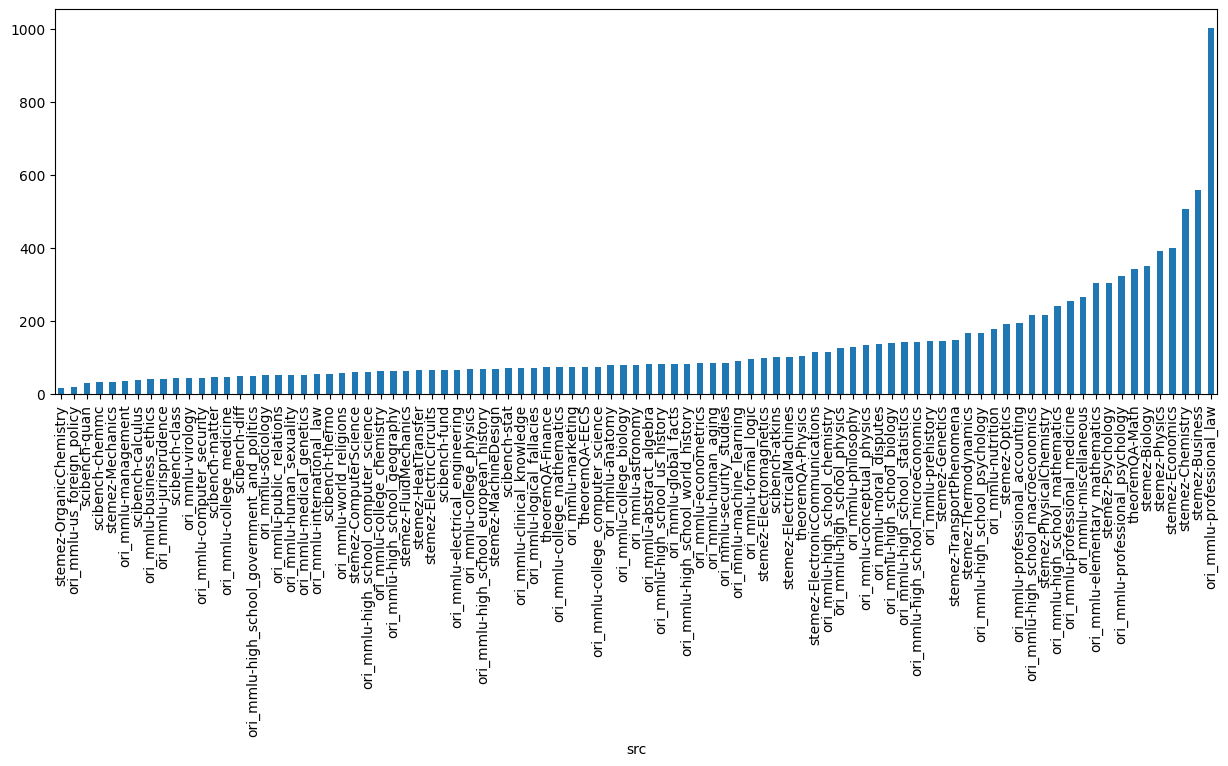

In [ ]:
try:
    src_grouped_mmlu_pro_df.size().sort_values().plot(kind="bar", figsize=(15, 5))
except Exception as e:
    print(e)

In [ ]:
# Downsample to ~1000 samples (~1/12) in total
downsampled_mmlu_pro_df = mmlu_pro_df.groupby("src").sample(frac=1 / 12, random_state=0)

downsampled_mmlu_pro_df

,question_id,question,options,answer,answer_index,cot_content,category,src
7821,8004,Statement 1 | Every solvable group is of prime...,"[Statement 1 is always true, Statement 2 is fa...",I,8,,math,ori_mmlu-abstract_algebra
8355,8542,Statement 1 | If H and K are subgroups of a gr...,"[True, False, True, True, False, False, False,...",B,1,,math,ori_mmlu-abstract_algebra
8146,8332,Statement 1 | If R is a ring and f(x) and g(x)...,"[False, Not Determined, Not Determined, Not De...",G,6,,math,ori_mmlu-abstract_algebra
8470,8657,"Statement 1 | If a R is an integral domain, th...","[True, True, True, Not Applicable, True, False...",C,2,,math,ori_mmlu-abstract_algebra
7710,7893,Find the maximum possible order for some eleme...,"[12, 360, 60, 8, 72, 120, 24, 30, 240, 480]",F,5,,math,ori_mmlu-abstract_algebra
...,...,...,...,...,...,...,...,...
9142,9331,A surveyor uses a steel measuring tape that is...,"[36.2, 35.4, 36.1, 36.0, 35.8, 35.7, 35.9, 35....",E,4,,physics,theoremQA-Physics
9139,9328,A curve with a 120 m radius on a level road is...,"[0.60, 0.28, 0.75, 0.25, 0.45, 0.55, 0.65, 0.1...",I,8,,physics,theoremQA-Physics
9649,9840,Find the fraction of the standard solar flux r...,"[0.890, 0.750, 0.475, 0.656, 0.825, 0.700, 0.5...",D,3,,physics,theoremQA-Physics
9554,9744,Point charges q1=50μC and q2=−25μC are placed...,"[65.32, 60.12 N, 30.47 N, 10.00 N, 80.25 N, 35...",I,8,,physics,theoremQA-Physics


In [ ]:
downsampled_mmlu_pro_df = downsampled_mmlu_pro_df.sample(n=1000, random_state=0)

In [ ]:
downsampled_mmlu_pro_df["src"].value_counts().sort_values()

src
stemez-OrganicChemistry        1
ori_mmlu-us_foreign_policy     1
stemez-Mechanics               3
ori_mmlu-management            3
scibench-calculus              3
                              ..
stemez-Economics              33
stemez-Physics                33
stemez-Chemistry              42
stemez-Business               46
ori_mmlu-professional_law     84
Name: count, Length: 91, dtype: int64

In [ ]:
# downsampled_mmlu_pro_df["src"].value_counts().sort_values().plot(
#     kind="bar", figsize=(15, 5)
# )

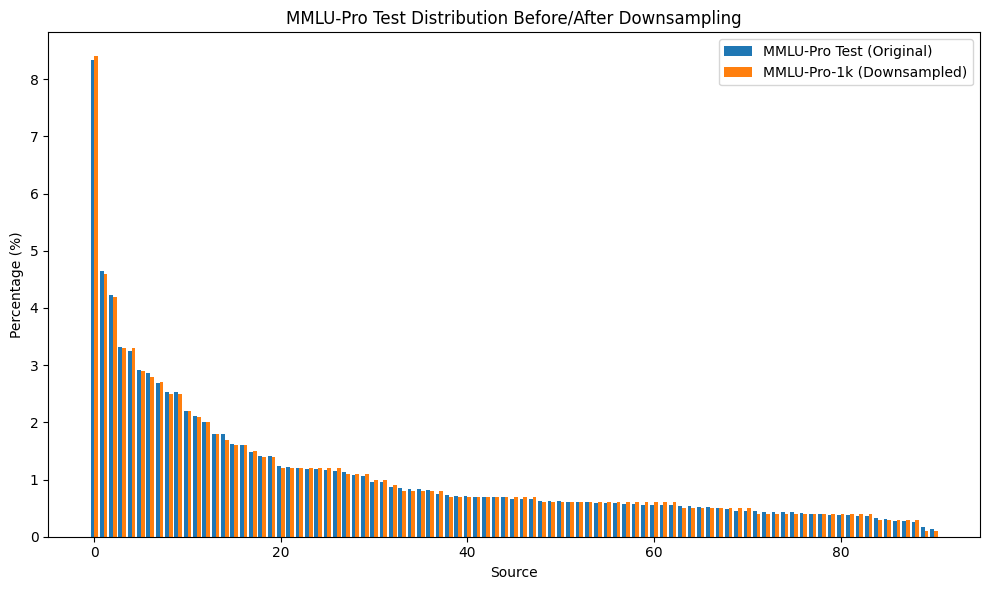

In [ ]:
try:
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd

    # Create dataframes with ratios for visualization
    total_orig = mmlu_pro_df["src"].value_counts().sum()
    total_downsampled = downsampled_mmlu_pro_df["src"].value_counts().sum()

    # Calculate percentages for both distributions
    orig_percentages = mmlu_pro_df["src"].value_counts().to_numpy() / total_orig * 100
    downsampled_percentages = (
        downsampled_mmlu_pro_df["src"].value_counts().to_numpy()
        / total_downsampled
        * 100
    )

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Set width of bars and positions of the bars
    width = 0.4  # Increased from 0.35 to make bars wider
    indices = np.arange(len(orig_percentages))

    # Create bars
    ax.bar(
        indices - width / 2,
        orig_percentages,
        width,
        label="MMLU-Pro Test (Original)",
        color="#1f77b4",
    )
    ax.bar(
        indices + width / 2,
        downsampled_percentages,
        width,
        label="MMLU-Pro-1k (Downsampled)",
        color="#ff7f0e",
    )

    # Customize the plot
    ax.set_ylabel("Percentage (%)")
    ax.set_title("MMLU-Pro Test Distribution Before/After Downsampling")
    # ax.set_xticks(indices)
    # ax.set_xticklabels(mmlu_pro_df["src"].value_counts().index, rotation=45, ha="right")
    ax.set_xlabel("Source")
    ax.legend()

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

    plt.show()

    # # Save PDF
    # viz_dir = Path("./data/viz")
    # viz_dir.mkdir(parents=True, exist_ok=True)
    # fig.savefig(
    #     viz_dir / "mmlu-pro-test-downsample.pdf",
    #     bbox_inches="tight",
    #     dpi=300,
    #     format="pdf",
    #     transparent=True,
    # )
except Exception as e:
    print(e)

In [ ]:
downsampled_mmlu_pro_df.to_json(
    "./data/datasets/mmlu-pro-1k.jsonl", lines=True, orient="records"
)
# downsampled_mmlu_pro_dataset = Dataset.from_pandas(downsampled_mmlu_pro_df)